# k-NN Grid search

### Importing libraries

In [1]:
import os
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pickle
import random
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import seaborn as sns
import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from pprint import pprint
from sklearn.metrics import classification_report
from skimage.feature import greycomatrix, greycoprops

### Define dataset and labels

In [2]:
dire="D:/Individual_Trees_photos/exatctcrop"
categories= ['European beech', 'European silver fir', 'Norway spruce', 'Sessile oak']

data =[]
SIZE = 200
images =[]
label1 =[]
for category in categories:
    path = os.path.join(dire, category)
    label = categories.index(category)
    
    
    for img in os.listdir(path):
        imgpath = os.path.join(path,img)
        tree_img = cv2.imread(imgpath,0)
        try:
            tree_img = cv2.resize(tree_img, (SIZE, SIZE)) #Resize images
            #tree_img = cv2.resize(tree_img,(50,50))
            image = np.array(tree_img).flatten()
        
            #data.append([image, label])
            images.append(tree_img)
            label1.append(label)
        except Exception as e:
            pass
images=np.array(images)   

### Feature extraction using GLCM

In [3]:
# FEATURE EXTRACTOR function
# input shape is (n, x, y, c) - number of images, x, y, and channels
def feature_extractor(dataset):
    image_dataset = pd.DataFrame()
    for image in range(dataset.shape[0]):  #iterate through each file 
        #print(image)
        
        df = pd.DataFrame()  #Temporary data frame to capture information for each loop.
        #Reset dataframe to blank after each loop.
        
        img = dataset[image, :,:]
        
        #Full image
        #GLCM = greycomatrix(img, [1], [0, np.pi/4, np.pi/2, 3*np.pi/4])
        GLCM = greycomatrix(img, [1], [0])       
        GLCM_Energy = greycoprops(GLCM, 'energy')[0]
        df['Energy'] = GLCM_Energy
        GLCM_corr = greycoprops(GLCM, 'correlation')[0]
        df['Corr'] = GLCM_corr       
        GLCM_diss = greycoprops(GLCM, 'dissimilarity')[0]
        df['Diss_sim'] = GLCM_diss       
        GLCM_hom = greycoprops(GLCM, 'homogeneity')[0]
        df['Homogen'] = GLCM_hom       
        GLCM_contr = greycoprops(GLCM, 'contrast')[0]
        df['Contrast'] = GLCM_contr
        
        GLCM2 = greycomatrix(img, [3], [0])       
        GLCM_Energy2 = greycoprops(GLCM2, 'energy')[0]
        df['Energy2'] = GLCM_Energy2
        GLCM_corr2 = greycoprops(GLCM2, 'correlation')[0]
        df['Corr2'] = GLCM_corr2       
        GLCM_diss2 = greycoprops(GLCM2, 'dissimilarity')[0]
        df['Diss_sim2'] = GLCM_diss2       
        GLCM_hom2 = greycoprops(GLCM2, 'homogeneity')[0]
        df['Homogen2'] = GLCM_hom2       
        GLCM_contr2 = greycoprops(GLCM2, 'contrast')[0]
        df['Contrast2'] = GLCM_contr2

        GLCM3 = greycomatrix(img, [5], [0])       
        GLCM_Energy3 = greycoprops(GLCM3, 'energy')[0]
        df['Energy3'] = GLCM_Energy3
        GLCM_corr3 = greycoprops(GLCM3, 'correlation')[0]
        df['Corr3'] = GLCM_corr3       
        GLCM_diss3 = greycoprops(GLCM3, 'dissimilarity')[0]
        df['Diss_sim3'] = GLCM_diss3       
        GLCM_hom3 = greycoprops(GLCM3, 'homogeneity')[0]
        df['Homogen3'] = GLCM_hom3       
        GLCM_contr3 = greycoprops(GLCM3, 'contrast')[0]
        df['Contrast3'] = GLCM_contr3
        
        GLCM4 = greycomatrix(img, [0], [np.pi/4])       
        GLCM_Energy4 = greycoprops(GLCM4, 'energy')[0]
        df['Energy4'] = GLCM_Energy4
        GLCM_corr4 = greycoprops(GLCM4, 'correlation')[0]
        df['Corr4'] = GLCM_corr4       
        GLCM_diss4 = greycoprops(GLCM4, 'dissimilarity')[0]
        df['Diss_sim4'] = GLCM_diss4       
        GLCM_hom4 = greycoprops(GLCM4, 'homogeneity')[0]
        df['Homogen4'] = GLCM_hom4       
        GLCM_contr4 = greycoprops(GLCM4, 'contrast')[0]
        df['Contrast4'] = GLCM_contr4
        
        GLCM5 = greycomatrix(img, [0], [np.pi/2])       
        GLCM_Energy5 = greycoprops(GLCM5, 'energy')[0]
        df['Energy5'] = GLCM_Energy5
        GLCM_corr5 = greycoprops(GLCM5, 'correlation')[0]
        df['Corr5'] = GLCM_corr5       
        GLCM_diss5 = greycoprops(GLCM5, 'dissimilarity')[0]
        df['Diss_sim5'] = GLCM_diss5       
        GLCM_hom5 = greycoprops(GLCM5, 'homogeneity')[0]
        df['Homogen5'] = GLCM_hom5       
        GLCM_contr5 = greycoprops(GLCM5, 'contrast')[0]
        df['Contrast5'] = GLCM_contr5
        
        #Add more filters as needed
        #entropy = shannon_entropy(img)
        #df['Entropy'] = entropy

        
        #Append features from current image to the dataset
        image_dataset = image_dataset.append(df)
        
    return image_dataset

In [4]:
#Extract features from images
image_features = feature_extractor(images)
X_for_ML =image_features


### Train-test split

In [5]:
#train test

xtrain, xtest, ytrain, ytest = train_test_split(X_for_ML, label1, test_size =0.25)

### Define k-NN classifier

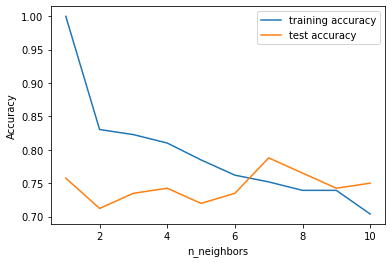

In [6]:
from sklearn.neighbors import KNeighborsClassifier

training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    # build the model
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(xtrain, ytrain)
    # record training set accuracy
    training_accuracy.append(knn.score(xtrain, ytrain))
    # record test set accuracy
    test_accuracy.append(knn.score(xtest, ytest))

plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.savefig('knn_compare_model')

In [7]:
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(xtrain, ytrain)

print('Accuracy of K-NN classifier on training set: {:.2f}'.format(knn.score(xtrain, ytrain)))
print('Accuracy of K-NN classifier on test set: {:.2f}'.format(knn.score(xtest, ytest)))

Accuracy of K-NN classifier on training set: 0.81
Accuracy of K-NN classifier on test set: 0.74


In [8]:
predictions1 = knn.predict(xtest)
print (classification_report(ytest, predictions1))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94        43
           1       0.56      0.58      0.57        24
           2       0.72      0.88      0.79        24
           3       0.64      0.56      0.60        41

    accuracy                           0.74       132
   macro avg       0.72      0.74      0.73       132
weighted avg       0.74      0.74      0.74       132



In [9]:
pprint(knn.get_params())

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 4,
 'p': 2,
 'weights': 'uniform'}


### Grid search

In [12]:
# Define parameters
n_neighbors=list(range(1,5))
leaf_size = list(range(1,50))
#n_jobs
n_jobs = [1, 2]

#p=[1, 2]

param_grid1 = dict(n_neighbors=n_neighbors, leaf_size = leaf_size,  n_jobs = n_jobs)

# Build the gridsearch
dfrst1 = KNeighborsClassifier(n_neighbors=n_neighbors, leaf_size = leaf_size, n_jobs = n_jobs)
grid1 = GridSearchCV(estimator=dfrst1, param_grid=param_grid1, cv = 15)
grid_results1 = grid1.fit(xtrain, ytrain)


# Summarize the results in a readable format
print("Best: {0}, using {1}".format(grid_results1.cv_results_['mean_test_score'], grid_results1.best_params_))
results_df1 = pd.DataFrame(grid_results1.cv_results_)
results_df1

Best: [0.67868421 0.66092105 0.67315789 0.66565789 0.67868421 0.66092105
 0.67315789 0.66565789 0.67868421 0.66092105 0.67315789 0.66565789
 0.67868421 0.66092105 0.67315789 0.66565789 0.67868421 0.66092105
 0.67315789 0.66565789 0.67868421 0.66092105 0.67315789 0.66565789
 0.67868421 0.66092105 0.67315789 0.66565789 0.67868421 0.66092105
 0.67315789 0.66565789 0.67868421 0.66092105 0.67315789 0.66565789
 0.67868421 0.66092105 0.67315789 0.66565789 0.67868421 0.66092105
 0.67315789 0.66565789 0.67868421 0.66092105 0.67315789 0.66565789
 0.67868421 0.66092105 0.67315789 0.66565789 0.67868421 0.66092105
 0.67315789 0.66565789 0.67868421 0.66092105 0.67315789 0.66565789
 0.67868421 0.66092105 0.67315789 0.66565789 0.67868421 0.66092105
 0.67315789 0.66565789 0.67868421 0.66092105 0.67315789 0.66565789
 0.67868421 0.66092105 0.67315789 0.66565789 0.67868421 0.66092105
 0.67315789 0.66565789 0.67868421 0.66092105 0.67315789 0.66565789
 0.67868421 0.66092105 0.67315789 0.66565789 0.67868421 

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_leaf_size,param_n_jobs,param_n_neighbors,params,split0_test_score,split1_test_score,...,split13_test_score,split14_test_score,split15_test_score,split16_test_score,split17_test_score,split18_test_score,split19_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002700,0.000640,0.003300,0.000713,1,1,1,"{'leaf_size': 1, 'n_jobs': 1, 'n_neighbors': 1}",0.70,0.60,...,0.75,0.45,0.789474,0.578947,0.578947,0.894737,0.631579,0.678684,0.093763,1
1,0.002400,0.000583,0.003049,0.000589,1,1,2,"{'leaf_size': 1, 'n_jobs': 1, 'n_neighbors': 2}",0.65,0.65,...,0.70,0.60,0.736842,0.631579,0.684211,0.736842,0.578947,0.660921,0.066804,295
2,0.002251,0.000767,0.003000,0.000774,1,1,3,"{'leaf_size': 1, 'n_jobs': 1, 'n_neighbors': 3}",0.75,0.70,...,0.65,0.45,0.684211,0.684211,0.684211,0.736842,0.473684,0.673158,0.090530,99
3,0.002300,0.000780,0.002850,0.000654,1,1,4,"{'leaf_size': 1, 'n_jobs': 1, 'n_neighbors': 4}",0.75,0.80,...,0.65,0.45,0.684211,0.684211,0.631579,0.631579,0.631579,0.665658,0.084692,197
4,0.002700,0.000557,0.007650,0.000476,1,2,1,"{'leaf_size': 1, 'n_jobs': 2, 'n_neighbors': 1}",0.70,0.60,...,0.75,0.45,0.789474,0.578947,0.578947,0.894737,0.631579,0.678684,0.093763,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
387,0.002600,0.000583,0.002950,0.000669,49,1,4,"{'leaf_size': 49, 'n_jobs': 1, 'n_neighbors': 4}",0.75,0.80,...,0.65,0.45,0.684211,0.684211,0.631579,0.631579,0.631579,0.665658,0.084692,197
388,0.003000,0.000447,0.007900,0.000830,49,2,1,"{'leaf_size': 49, 'n_jobs': 2, 'n_neighbors': 1}",0.70,0.60,...,0.75,0.45,0.789474,0.578947,0.578947,0.894737,0.631579,0.678684,0.093763,1
389,0.002500,0.000500,0.007650,0.000654,49,2,2,"{'leaf_size': 49, 'n_jobs': 2, 'n_neighbors': 2}",0.65,0.65,...,0.70,0.60,0.736842,0.631579,0.684211,0.736842,0.578947,0.660921,0.066804,295
390,0.002700,0.000458,0.007700,0.000458,49,2,3,"{'leaf_size': 49, 'n_jobs': 2, 'n_neighbors': 3}",0.75,0.70,...,0.65,0.45,0.684211,0.684211,0.684211,0.736842,0.473684,0.673158,0.090530,99
